In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Ablation : NN-Sparse Zeta Selection

In [3]:
dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV5.pkl")
dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [4]:
results

,Model,zeta,count,mean_sent
0,WSM,0.000001,50,15.747426
1,WSM,0.000010,50,19.141185
2,WSM,0.000100,50,24.702122
3,WSM,0.001000,50,14.778471


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


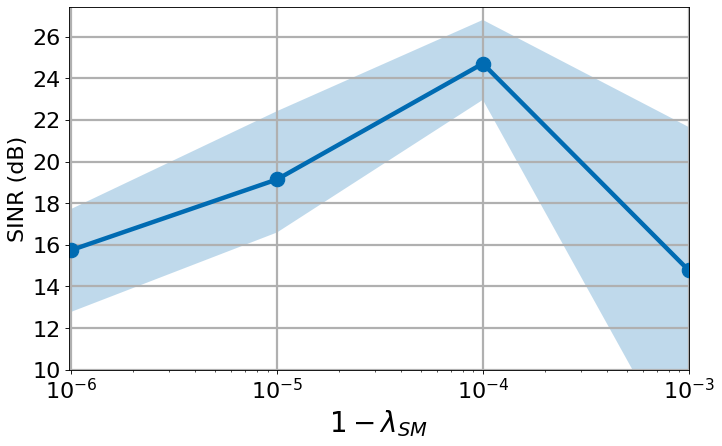

In [5]:
data= []
zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
for zeta__ in zeta_list:
    data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("zeta")
plt.ylabel("SINR")

plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,27.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
ApplyFont(plt.gca())
plt.savefig('Figures/zeta_ablation.pdf', format='pdf', bbox_inches = 'tight')

In [6]:
# dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV1.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
# results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [7]:
# results

In [8]:
# data= []
# zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
# for zeta__ in zeta_list:
#     data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the mean, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/zeta_ablation.pdf', format='pdf')

In [9]:
# dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV2.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
# results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [10]:
# results

In [11]:
# data= []
# zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
# for zeta__ in zeta_list:
#     data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the mean, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/zeta_ablation.pdf', format='pdf')

In [12]:
# dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV3.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
# results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [13]:
# results

In [14]:
# data= []
# zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
# for zeta__ in zeta_list:
#     data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the mean, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,25.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/zeta_ablation.pdf', format='pdf')

In [15]:
# dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV4.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
# results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [16]:
# results

In [17]:
# data= []
# zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
# for zeta__ in zeta_list:
#     data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the mean, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,26.9])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/zeta_ablation.pdf', format='pdf')

In [18]:
# dfzeta = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_zetaV5.pkl")
# dfzeta = dfzeta.iloc[:4*(dfzeta.shape[0]//4)]
# results = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()

In [19]:
# results

In [20]:
# data= []
# zeta_list = [1e-3, 1e-4, 1e-5, 1e-6]
# for zeta__ in zeta_list:
#     data.append(dfzeta.loc[dfzeta['zeta'] == zeta__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the mean, 25/75 percentiles, and standard deviation
# med, perc_25, perc_75, std_data = perc(data)

# SINRresults = dfzeta[['Model', 'zeta', 'SINR']].groupby(['Model', 'zeta']).agg({'zeta':'size', 'SINR':'mean'}).rename(columns={'zeta':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['zeta'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.semilogx(zeta, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(zeta, np.flipud(perc_25), np.flipud(perc_75), alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([1e-6 - 3e-8,1e-3 + 3e-8,10,27.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$1 - \lambda_{SM}$',fontsize=25)
# ApplyFont(plt.gca())
# plt.savefig('Figures/zeta_ablation.pdf', format='pdf', bbox_inches = 'tight')

# Ablation : NN-Sparse Initial D1 Gain 

In [21]:
dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V3.pkl")
dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [22]:
results

,Model,D1,count,mean_sent
0,WSM,4,50,24.953703
1,WSM,8,50,23.690106
2,WSM,12,50,23.346324
3,WSM,16,50,23.345519


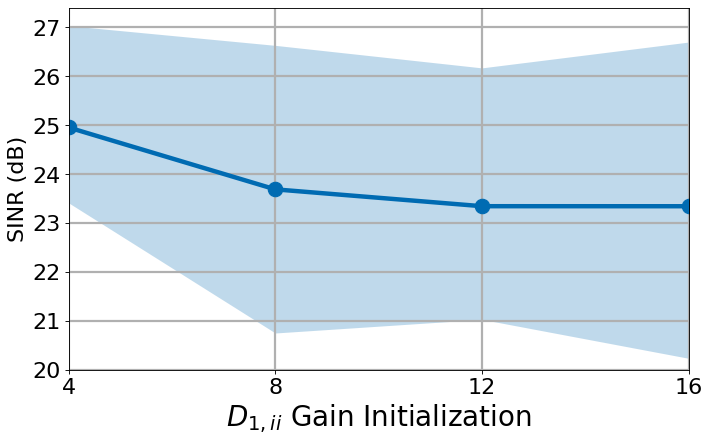

In [23]:
data= []
D1list = [4,8,12,16]
for d1start__ in D1list:
    data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(D1list, fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4,16,20,27.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
ApplyFont(plt.gca())
plt.savefig('Figures/D1start_ablation.pdf', format='pdf', bbox_inches = 'tight')

In [24]:
# dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V1.pkl")
# dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
# results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [25]:
# results

In [26]:
# data= []
# D1list = [4,8,12,16]
# for d1start__ in D1list:
#     data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()
# plt.xlabel("zeta")
# plt.ylabel("SINR")

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([4,16,20,26.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/D1start_ablation.pdf', format='pdf')

In [27]:
# dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V2.pkl")
# dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
# results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [28]:
# results

In [29]:
# data= []
# D1list = [4,8,12,16]
# for d1start__ in D1list:
#     data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([4,16,20,27.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/D1start_ablation.pdf', format='pdf')

In [30]:
# dfD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_initalD1_V3.pkl")
# dfD1 = dfD1.iloc[:4*(dfD1.shape[0]//4)]
# results = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()

In [31]:
# results

In [32]:
# data= []
# D1list = [4,8,12,16]
# for d1start__ in D1list:
#     data.append(dfD1.loc[dfD1['D1'] == d1start__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfD1[['Model', 'D1', 'SINR']].groupby(['Model', 'D1']).agg({'D1':'size', 'SINR':'mean'}).rename(columns={'D1':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['D1'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(D1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(D1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(D1list, fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([4,16,20,27.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$D_{1,ii}$ Gain Initialization',fontsize=25)
# ApplyFont(plt.gca())
# plt.savefig('Figures/D1start_ablation.pdf', format='pdf', bbox_inches = 'tight')

# Ablation : NN-Sparse $\mu_{D_1}$

In [33]:
dfmuD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_muD1_V2.pkl")
dfmuD1 = dfmuD1.iloc[:4*(dfmuD1.shape[0]//4)]

results = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()

In [34]:
results

,Model,muD1,count,mean_sent
0,WSM,5,50,24.744364
1,WSM,10,50,24.571835
2,WSM,15,50,25.329096
3,WSM,20,50,24.190472


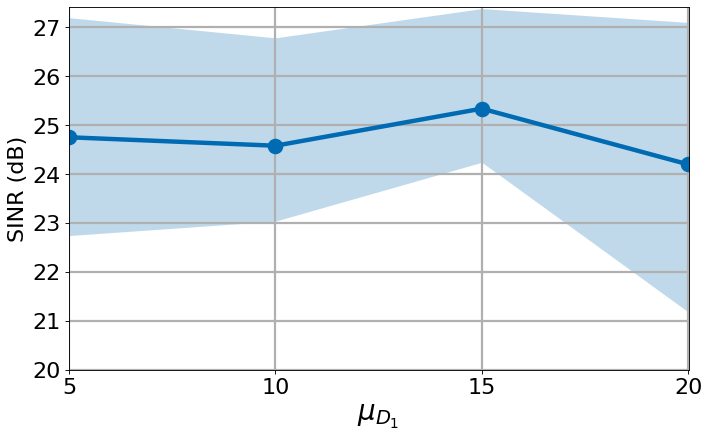

In [35]:
data= []
muD1list = [5,10,15,20]
for muD1__ in muD1list:
    data.append(dfmuD1.loc[dfmuD1['muD1'] == muD1__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['muD1'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muD1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muD1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(muD1list, fontsize=20)
plt.yticks(fontsize=20)
plt.axis([4.99,20.01,20,27.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'$\mu_{D_{1}}$',fontsize=25)
ApplyFont(plt.gca())
plt.savefig('Figures/muD1_ablation.pdf', format='pdf', bbox_inches = 'tight')

In [36]:
# dfmuD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_muD1_V1.pkl")
# dfmuD1 = dfmuD1.iloc[:4*(dfmuD1.shape[0]//4)]
# results = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()

In [37]:
# results

In [38]:
# data= []
# muD1list = [5,10,15,20]
# for muD1__ in muD1list:
#     data.append(dfmuD1.loc[dfmuD1['muD1'] == muD1__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['muD1'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(muD1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(muD1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([4.99,20.01,19,26.9])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$\mu_{D_{1}}$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/muD1_ablation.pdf', format='pdf')

In [39]:
# dfmuD1 = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_muD1_V2.pkl")
# dfmuD1 = dfmuD1.iloc[:4*(dfmuD1.shape[0]//4)]

# results = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()

In [40]:
# results

In [41]:
# data= []
# muD1list = [5,10,15,20]
# for muD1__ in muD1list:
#     data.append(dfmuD1.loc[dfmuD1['muD1'] == muD1__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfmuD1[['Model', 'muD1', 'SINR']].groupby(['Model', 'muD1']).agg({'muD1':'size', 'SINR':'mean'}).rename(columns={'muD1':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['muD1'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(muD1list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(muD1list, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(muD1list, fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([4.99,20.01,20,27.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$\mu_{D_{1}}$',fontsize=25)
# ApplyFont(plt.gca())
# plt.savefig('Figures/muD1_ablation.pdf', format='pdf', bbox_inches = 'tight')

# Ablation : NN-Sparse $1 - \gamma^2$

In [42]:
dfMUS = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_MUS_V2.pkl")
dfMUS = dfMUS.iloc[:4*(dfMUS.shape[0]//4)]
results = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()

In [43]:
results

,Model,MUS,count,mean_sent
0,WSM,0.15,50,22.942421
1,WSM,0.20,50,24.499475
2,WSM,0.25,50,25.329096
3,WSM,0.30,50,24.285949


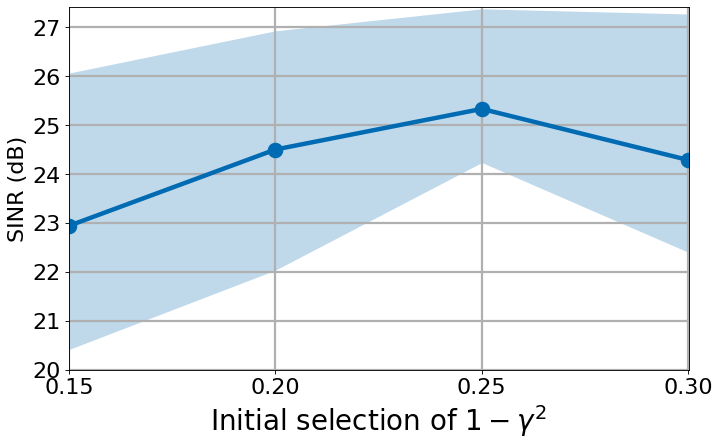

In [44]:
data= []
MUSlist = [0.15, 0.20, 0.25, 0.3]
for MUS__ in MUSlist:
    data.append(dfMUS.loc[dfMUS['MUS'] == MUS__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, _ = perc(data)
perc_25

SINRresults = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()
zeta = np.array(SINRresults['MUS'].values, dtype = np.float64)
SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(MUSlist, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(MUSlist, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()

plt.grid(linewidth=2)
plt.xticks(MUSlist, fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.1499,0.3001,20,27.4])
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r'Initial selection of $1 - \gamma^2$',fontsize=25)

ApplyFont(plt.gca())
plt.savefig('Figures/MUS_ablation.pdf', format='pdf', bbox_inches = 'tight')

In [45]:
# dfMUS = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_MUS_V1.pkl")
# dfMUS = dfMUS.iloc[:4*(dfMUS.shape[0]//4)]
# results = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()

In [46]:
# results

In [47]:
# data= []
# MUSlist = [0.15, 0.20, 0.25, 0.3]
# for MUS__ in MUSlist:
#     data.append(dfMUS.loc[dfMUS['MUS'] == MUS__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['MUS'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(MUSlist, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(MUSlist, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([0.1499,0.3001,19,27])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'$\gamma$',fontsize=25)
# ApplyFont(plt.gca())
# # plt.savefig('Figures/MUS_ablation.pdf', format='pdf')

In [48]:
# dfMUS = pd.read_pickle(r"../Results/simulation_results_nnsparse_ablation_MUS_V2.pkl")
# dfMUS = dfMUS.iloc[:4*(dfMUS.shape[0]//4)]
# results = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()

In [49]:
# results

In [50]:
# data= []
# MUSlist = [0.15, 0.20, 0.25, 0.3]
# for MUS__ in MUSlist:
#     data.append(dfMUS.loc[dfMUS['MUS'] == MUS__]['SINR'].values.tolist())
    
# data = np.stack(data, axis = 1)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, _ = perc(data)
# perc_25

# SINRresults = dfMUS[['Model', 'MUS', 'SINR']].groupby(['Model', 'MUS']).agg({'MUS':'size', 'SINR':'mean'}).rename(columns={'MUS':'count','SINR':'mean_sent'}).reset_index()
# zeta = np.array(SINRresults['MUS'].values, dtype = np.float64)
# SINR = np.array(SINRresults['mean_sent'].values, dtype = np.float64)

# SetPlotRC()
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(MUSlist, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
# plt.fill_between(MUSlist, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')
# plt.grid()

# plt.grid(linewidth=2)
# plt.xticks(MUSlist, fontsize=20)
# plt.yticks(fontsize=20)
# plt.axis([0.1499,0.3001,20,27.4])
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r'Initial selection of $1 - \gamma^2$',fontsize=25)

# ApplyFont(plt.gca())
# plt.savefig('Figures/MUS_ablation.pdf', format='pdf', bbox_inches = 'tight')